# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
emails = pd.read_csv('./emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
print("The dataset has ", emails.shape[0], "rows and ", emails.shape[1], "columns")

The dataset has  5172 rows and  3002 columns


Let's have a look at the first and last entries of the dataset. 

In [4]:
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
emails.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
emails.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
emails['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

## Looking at the data

In [9]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_emails = emails[emails['Prediction'] ==1]
normal_emails = emails[emails['Prediction'] ==0]

In [10]:
spam_word_freq = spam_emails.drop(['Prediction','Email No.'], axis=1).sum()
non_spam_word_freq = normal_emails.drop(['Prediction', 'Email No.'], axis=1).sum()

In [11]:
spam_word_frequencies = spam_word_freq.sort_values(ascending=False)
non_spam_word_frequencies = non_spam_word_freq.sort_values(ascending=False)

In [12]:

top_5_spam_words = spam_word_frequencies.head(5)
top_5_non_spam_words = non_spam_word_frequencies.head(5)

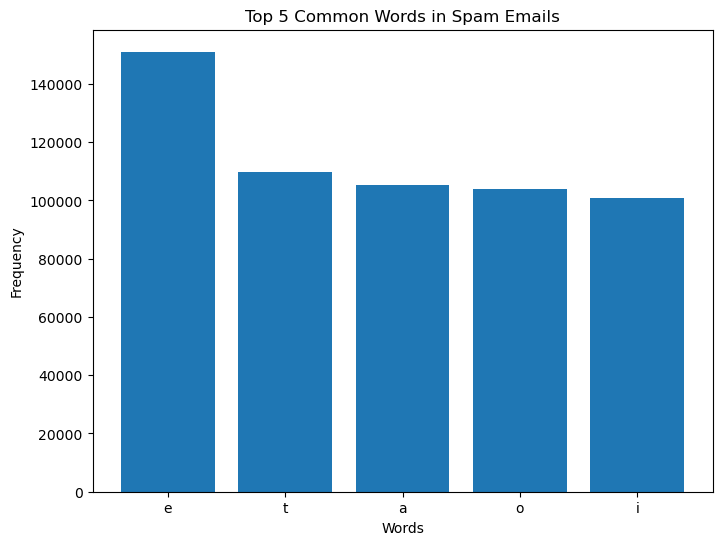

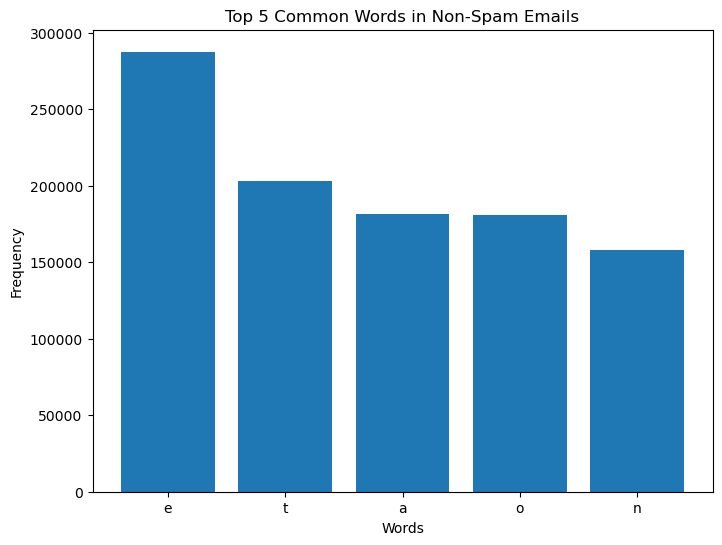

In [13]:
# Plot histogram for top 5 common words in spam emails
plt.figure(figsize=(8, 6))
plt.bar(top_5_spam_words.index, top_5_spam_words.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Common Words in Spam Emails')
plt.show()

# Plot histogram for top 5 common words in non-spam emails
plt.figure(figsize=(8, 6))
plt.bar(top_5_non_spam_words.index, top_5_non_spam_words.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 5 Common Words in Non-Spam Emails')
plt.show()

## Figuring out some comparatively more important features

In [14]:
# There are 3K columns given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 

column_frequencies = emails.drop(['Prediction', 'Email No.'],axis=1).sum(axis=0)

In [15]:

sorted_columns = column_frequencies.sort_values(ascending=False)

In [16]:

top_1_5k_columns = sorted_columns[:1500].index.tolist()


top_factors =emails[top_1_5k_columns]

In [17]:
better_emails = pd.concat([top_factors, emails['Prediction']], axis=1)

In [18]:
better_emails

,e,t,a,o,n,i,r,s,l,c,...,enserch,nothing,become,bellamy,facility,pick,apache,cernosek,features,Prediction
0,4,4,2,0,0,2,4,3,0,3,...,0,0,0,0,0,0,0,0,0,0
1,141,91,102,131,70,61,122,95,35,68,...,0,0,0,0,0,0,0,0,0,0
2,3,3,8,5,8,8,0,2,4,4,...,0,0,0,0,0,0,0,0,0,0
3,79,49,51,48,23,16,46,36,27,50,...,0,0,0,0,0,0,0,0,0,0
4,71,63,57,58,42,30,41,19,34,37,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,29,30,32,15,30,20,20,18,9,16,...,0,0,0,0,0,0,0,0,0,0
5168,218,190,151,128,119,98,98,101,63,70,...,0,0,0,0,0,0,0,0,0,0
5169,12,11,11,8,6,10,4,11,5,3,...,0,0,0,0,0,0,0,0,0,1
5170,45,50,28,47,29,39,25,37,10,18,...,0,0,0,0,0,0,0,0,0,1


## Train - Test Split

In [19]:
X = better_emails.drop('Prediction', axis=1)
y = better_emails['Prediction']

In [20]:
# Create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
X_train.shape

(3620, 1500)

## Making Predictions using Multinomial NB Classifier

In [33]:
# Feed the train data into multinomial naive bias classifier
# Convert the text data into numerical features using CountVectorizer

# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = classifier.score(X_test, y_test)

In [35]:
accuracy

0.9259020618556701

In [37]:
# Calculate ROC-AUC
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9679463261195765


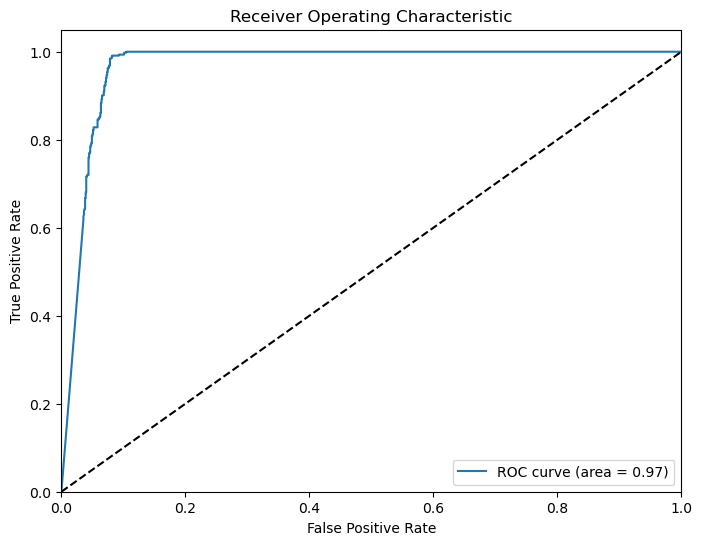

In [38]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Plot the confusion Matrix

In [41]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

# Select five words for confusion matrix
selected_words = ['a', 'an', 'the', 'e', 't']

# Filter the test set and predicted labels for the selected words
X_test_selected_words = X_test[selected_words]
y_test_selected_words = y_test
y_pred_selected_words = y_pred

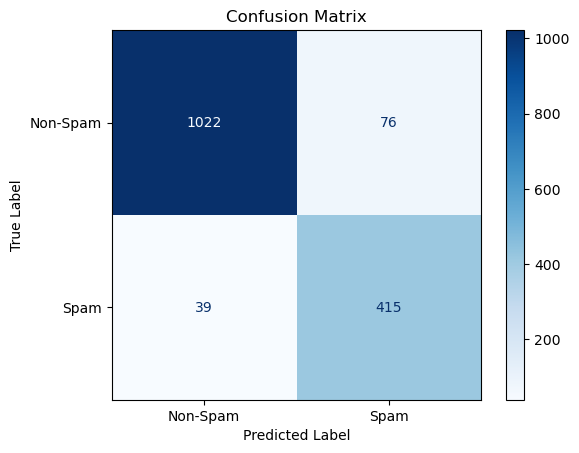

In [42]:
# Create the confusion matrix
cm = confusion_matrix(y_test_selected_words, y_pred_selected_words)

# Plot the confusion matrix
display_labels = ['Non-Spam', 'Spam']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Trying out with SVMs

In [44]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

# Train the Support Vector Classifier (SVC)
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [46]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7931701030927835


In [47]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

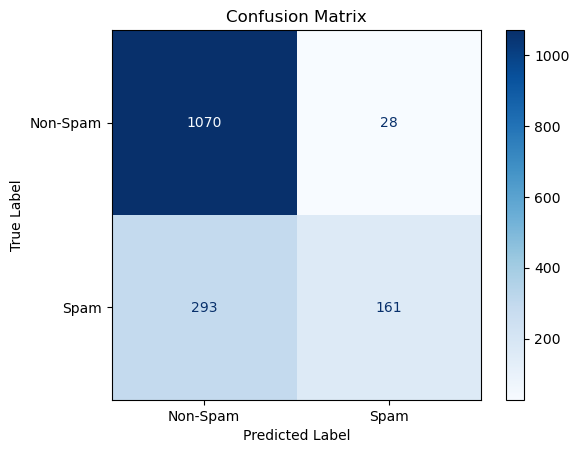

In [48]:
# Plot the confusion matrix
display_labels = ['Non-Spam', 'Spam']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparing the models

It is evident from the confusion matrix that MNB had better precision and recall and overall accuracy making it a better algorithm than SVC.

## Bonus Question

In [26]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Input string
s = "I am a Python developer and currently working on a project to classify mails"

def create_freq_dataset(string):
    vectorizer = CountVectorizer()
    vectorizer.fit([string])
    word_matrix = vectorizer.transform([s])
    feature_names = vectorizer.vocabulary_
    df = pd.DataFrame(word_matrix.toarray(), columns=feature_names)
    
    return df 


In [57]:
s = "I am a Python developer and currently working on a project to classify mails"

create_freq_dataset(s)

,am,python,developer,and,currently,working,on,project,to,classify,mails
0,1,1,1,1,1,1,1,1,1,1,1
